# Workshop 2c: SciPy

This workshop is based on the workshop of last years of André Jüling, created under the BSD 3-Clause License (https://github.com/AJueling/python_climate_physics), and Janneke Krabbendam.

This is very short introduction to Scipy, much of content here is taken from the excellent [SciPy tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html).

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data.

SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the following table:

| Subpackage | Description |
|---| ---|
| cluster    | Clustering algorithms |
| constants | Physical and mathematical constants |
| fftpack | Fast Fourier Transform routine |
| integrate| Integration and ordinary differential equation solvers |
| interpolate | Interpolation and smoothing splines |
| io | Input and Output |
| linalg | Linear algebra |
| ndimage | N-dimensional image processing |
| odr | Orthogonal distance regression |
| optimize | Optimization and root-finding routines |
| signal | Signal processing |
| sparse | Sparse matrices and associated routines |
| spatial | Spatial data structures and algorithms |
| special | Special functions |
| stats | Statistical distributions and functions |

In this, very short, workshop, we will only cover two examples: interpolation and curvefitting. 

First, we will do some 1D-interpolation. In short, `interp1d` creates a function that approximates your original data and you can apply this function to a new array (with for example a higher or lower resolution).

Then, we will do some curve-fitting. First, you have to define a function which approximately describes your data. So you have to make a guess what kind of funcion will fit your data (exponential, linear, ....). In this function, you define a few variables that will be fitted to your data with least-squares using `curve-fit`.

Examples are shown below:

These subpackages are called explicitly: 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize as optm

%matplotlib inline

In [2]:
interp1d?

# Interpolation

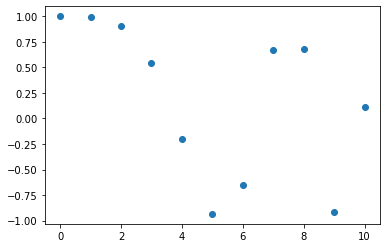

In [3]:
# data
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

plt.scatter(x,y)

In [4]:
# first create a function that approximates the data that we have
f = interp1d(x, y) # linear interpolation
f2 = interp1d(x, y, kind='cubic') # cubic interpolation

# create a new array to which we want to interpolate our original data
xnew = np.linspace(0, 10, num=41, endpoint=True)

# apply the function to this new array
ynew = f(xnew)
ynew2 = f2(xnew)

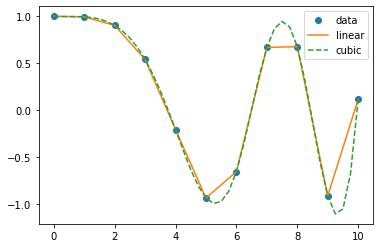

In [5]:
# plot the output
plt.plot(x, y, 'o')
plt.plot(xnew, ynew, '-')
plt.plot(xnew, ynew2, '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()


# Curve-fitting

In [6]:
# function that we are going to fit to the data
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

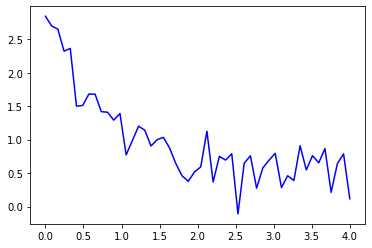

In [7]:
# create exponential data with random noise
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

We have added noise to an exponential function. Now we can use our function 'func' for the curve-fitting. 

The parameters that need to be determined with `curve-fit`, are `a`, `b` and `c`.

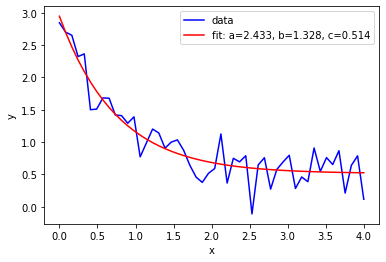

array([2.43261996, 1.32754108, 0.51369809])

In [8]:
popt, pcov = optm.curve_fit(func, xdata, ydata)
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
popt # these are the best values for a, b, and c

You can create a better fit by either giving a initial guess of the variables, or by giving bounds. These are values between which the parameters need to found.

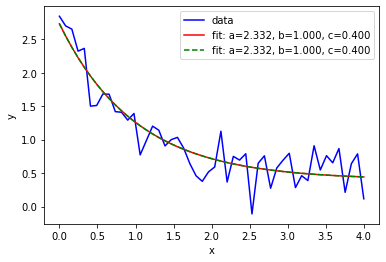

In [9]:
popt, pcov = optm.curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## <span style="color:blue">Exercise</span>
This time, only a single exercise to make you familiar with the use pattern of SciPy.

1. Use a SciPy function to solve a linear regression problem of the following random data:
```
np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)
```
Print the slope, intercept, and $R^2$ values and make a plot.
<img src="Figures/2d1.png" width="600">





## <span style="color:green">Solutions</span>
Again, this is a  possible solutions.



slope: 1.9448642607472155; intercept: 0.26857823524544855; R^2: 0.7354980392850927


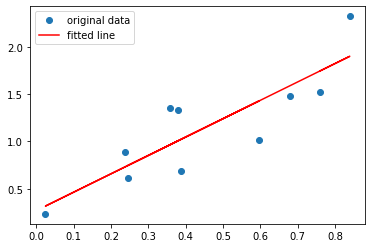

In [10]:
# 1. Use a SciPy function to solve a linear regression problem
# of the following random data [...].
# Print the slope, intercept, and $R^2$ values and make a plot
from scipy import stats

np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f'slope: {slope}; intercept: {intercept}; R^2: {r_value**2}')

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.savefig('2d1.png')